# Daily Attendance Case Study
## Matthew Yuen 

The purpose of this Python Notebook is to provide some data visualization and analytics of the Annual Attendance data provided by the [Association of Science Technology Centres (ASTC)](https://www.astc.org/)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

We begin by importing a few Python Packages which will be useful for us. 

[Numpy](http://www.numpy.org/) is a useful package containing tons of built-in mathematical programs and functions to perform calcuations such as linear matricies and integration techniques. 

[Pandas](https://pandas.pydata.org/) will be the basis of this notebook as it allows for easy data analysis from Excel CSV files. We can turn them into DataFrames and manipulate different tablular indexes. 

[Matplotlib](https://matplotlib.org/) is a visualization package in Python which allows for creation of 2D/3D plots and graphing mathemical functions and surfaces. 


# Table of Contents: 

    0. Setting up the data
    1. Max Attendance Rates
    2. Percentage ratios
        2.1 - Percentage of Public/Total
        2.2 - Percentage of Member/Total
        2.3 - Percentage of Group/Total
        2.4 - Percentage of School/Total
        2.5 - Percentage of Birthdays/Total
    3. Splitting years
        3.1 - Graphing 2017 to 2018
        3.2 - Graphing all Percentage Ratios
        3.3 - Graphing all Attendance types by year
        3.4 - Graphing average total attendance by year
        3.5 - Graphing Annual Public vs. Member totals
        3.6 - Finding Specific Dates
    4. Recommendations

# 0 - Setting up data
First, let's import the data. 

In [3]:
data = pd.read_csv('DailyAttendanceDetail.csv')

Calling `.head()` shows the first 5 rows in the DataFrame and `.tail()` shows the last 5 rows. 

In [4]:
data.head()

,Date,Public,Member,Group,School,Birthdays,Total,Weather,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,11/08/2018,477.0,303.0,42.0,276.0,0.0,1098,Cloudy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/07/2018,423.0,322.0,11.0,327.0,NaN,1083,Cloudy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/06/2018,421.0,321.0,0.0,761.0,0.0,1503,Cloudy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/05/2018,557.0,296.0,9.0,269.0,0.0,1131,Cloudy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/04/2018,1288.0,1449.0,46.0,0.0,83.0,2866,Rainy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,Date,Public,Member,Group,School,Birthdays,Total,Weather,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
3659,8/5/08,934.0,213.0,217.0,0.0,0.0,"1,364",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3660,8/4/08,1234.0,385.0,19.0,0.0,0.0,"1,638",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,8/3/08,937.0,300.0,65.0,0.0,0.0,"1,302",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,8/2/08,1766.0,540.0,157.0,0.0,0.0,"2,463",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data set consists of museum attendance from August 2, 2008 to November 8, 2018. 

The data set also has a bunch of `Unnamed` columns, so we will remove these. 

In [6]:
data = data.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
          'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
          'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
          'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)
data.head()

,Date,Public,Member,Group,School,Birthdays,Total,Weather
0,11/08/2018,477.0,303.0,42.0,276.0,0.0,1098,Cloudy
1,11/07/2018,423.0,322.0,11.0,327.0,NaN,1083,Cloudy
2,11/06/2018,421.0,321.0,0.0,761.0,0.0,1503,Cloudy
3,11/05/2018,557.0,296.0,9.0,269.0,0.0,1131,Cloudy
4,11/04/2018,1288.0,1449.0,46.0,0.0,83.0,2866,Rainy


Next we can see the various data types.

In [7]:
data.dtypes

Date          object
Public       float64
Member       float64
Group        float64
School       float64
Birthdays    float64
Total         object
Weather       object
dtype: object

We want `Total` to be a `float64`, which means integer instead of `object` which is a string. This is because we would like to play around with these numbers in the form of graphs and math.

In [8]:
data['Total'] = pd.to_numeric(data['Total'], errors = 'coerce')

In [9]:
data.head()

,Date,Public,Member,Group,School,Birthdays,Total,Weather
0,11/08/2018,477.0,303.0,42.0,276.0,0.0,1098.0,Cloudy
1,11/07/2018,423.0,322.0,11.0,327.0,NaN,1083.0,Cloudy
2,11/06/2018,421.0,321.0,0.0,761.0,0.0,1503.0,Cloudy
3,11/05/2018,557.0,296.0,9.0,269.0,0.0,1131.0,Cloudy
4,11/04/2018,1288.0,1449.0,46.0,0.0,83.0,2866.0,Rainy


In [10]:
data.dtypes

Date          object
Public       float64
Member       float64
Group        float64
School       float64
Birthdays    float64
Total        float64
Weather       object
dtype: object

Now we reset the total column by readding in the `Public`, `Member`, `Group`, `School`, and `Birthdays` attendance totals. This can be done by a function called `np.add`.  Unfortunately with `np.add` we can only add two rows at a time.

In [11]:
data['Total'] = np.add(data['Public'],data['Member'])
data['Total'] = np.add(data['Group'],data['Total'])
data['Total'] = np.add(data['School'],data['Total'])
data['Total'] = np.add(data['Birthdays'],data['Total'])
data.head()

,Date,Public,Member,Group,School,Birthdays,Total,Weather
0,11/08/2018,477.0,303.0,42.0,276.0,0.0,1098.0,Cloudy
1,11/07/2018,423.0,322.0,11.0,327.0,NaN,NaN,Cloudy
2,11/06/2018,421.0,321.0,0.0,761.0,0.0,1503.0,Cloudy
3,11/05/2018,557.0,296.0,9.0,269.0,0.0,1131.0,Cloudy
4,11/04/2018,1288.0,1449.0,46.0,0.0,83.0,2866.0,Rainy


We will also have to fill `NaN` values with 0. 

In [12]:
data = data.fillna(0)

It is worth noting that `data` is a DataFrame. A DataFrame is a tabular data structure with labelled axes and can have operations performed to columns and rows. More information can be found [here](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html).

# 1 - Max Attendances

Suppose we wanted to find the highest attendance dates in our dataset. 

In [12]:
busy_public = data.sort_values(by = "Public", ascending = False)
busy_public.head()

,Date,Public,Member,Group,School,Birthdays,Total,Weather
766,10/2/16,11996.0,0.0,0.0,0.0,0.0,11996.0,Sunny
1648,5/4/14,5132.0,1071.0,6.0,0.0,53.0,6262.0,Rainy
2841,12/30/10,4530.0,437.0,19.0,0.0,0.0,4986.0,Sunny
2832,1/8/11,4481.0,273.0,171.0,0.0,0.0,4925.0,Cloudy
1649,5/3/14,4284.0,945.0,52.0,0.0,88.0,5369.0,Rainy


The day with the most public admission was on October 2, 2016. 

In [13]:
busy_member = data.sort_values(by = "Member", ascending = False)
busy_member.head()

,Date,Public,Member,Group,School,Birthdays,Total,Weather
360,11/13/17,2309.0,2429.0,12.0,0.0,0.0,4750.0,Rainy
284,1/28/18,1939.0,2164.0,129.0,0.0,68.0,4300.0,Rainy
361,11/12/17,2356.0,2075.0,25.0,0.0,91.0,4547.0,Rainy
1739,2/2/14,1133.0,2057.0,0.0,0.0,32.0,3222.0,Cloudy
2336,5/21/12,2501.0,2036.0,56.0,20.0,0.0,4613.0,Rainy


There were 2429 members entering the museum on November 13, 2017. 

In [14]:
busy_school = data.sort_values(by = 'School', ascending = False)
busy_school.head()

,Date,Public,Member,Group,School,Birthdays,Total,Weather
559,4/28/17,744.0,435.0,9.0,1151.0,0.0,2339.0,Sunny
2860,12/10/10,628.0,94.0,23.0,1043.0,0.0,1788.0,Rainy
161,5/31/18,828.0,396.0,12.0,1017.0,0.0,0.0,Sunny
2863,12/7/10,281.0,78.0,15.0,997.0,0.0,1371.0,Rainy
985,2/26/16,636.0,375.0,55.0,992.0,0.0,2058.0,Cloudy


In [15]:
(1151/2339)*100

49.209063702436936

April 28, 2017 had 1151 students from school groups entering the museum. They made up 49% of attendance for that day. 

In [16]:
busy_birthday = data.sort_values(by = 'Birthdays', ascending = False)
busy_birthday.head()

,Date,Public,Member,Group,School,Birthdays,Total,Weather
663,1/14/17,1139.0,1146.0,59.0,0.0,163.0,0.0,Sunny
3172,12/6/09,416.0,382.0,588.0,0.0,153.0,1539.0,Sunny
18,10/21/2018,1121.0,827.0,0.0,0.0,151.0,2099.0,Sunny
3069,5/8/10,646.0,285.0,10.0,0.0,150.0,1091.0,Sunny
2530,11/6/11,714.0,393.0,0.0,0.0,145.0,1252.0,Sunny


One birthday party on January 14, 2017 had 163 guests. 

In [17]:
max_total = data.sort_values(by = 'Total', ascending = False)
max_total.head()

,Date,Public,Member,Group,School,Birthdays,Total,Weather
766,10/2/16,11996.0,0.0,0.0,0.0,0.0,11996.0,Sunny
1648,5/4/14,5132.0,1071.0,6.0,0.0,53.0,6262.0,Rainy
1367,2/9/15,3830.0,1927.0,26.0,0.0,0.0,5783.0,Rainy
121,7/10/18,4064.0,1131.0,297.0,0.0,0.0,5492.0,Cloudy
314,12/29/17,3420.0,1795.0,176.0,0.0,0.0,5391.0,Rainy


# 2 - Percentage Ratios of Attendance

We can calculate what percentage of total attendance was a Public, Member, Group, School, or Birthday event. 

This will be done by creating a separate column in the DataFrame and using `np.divide()` to divide values between two columns. 

### 2.1 - Public to Total Ratio

In [12]:
data['PT ratio'] = np.divide(data['Public'],data['Total'])*100;

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


### 2.2 - Member to Total Ratio

In [13]:
data['MT ratio'] = np.divide(data['Member'],data['Total'])*100

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


### 2.3 - Group to Total Ratio

In [14]:
data['GT ratio'] = np.divide(data['Group'],data['Total'])*100;

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


### 2.4 - School to Total Ratio

In [15]:
data['ST ratio'] = np.divide(data['School'],data['Total'])*100

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


### 2.5 - Birthdays to Total Ratio

In [16]:
data['BT ratio'] = np.divide(data['Birthdays'],data['Total'])*100

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Let's view the data 

In [17]:
data.head()

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
0,11/08/2018,477.0,303.0,42.0,276.0,0.0,1098.0,Cloudy,43.442623,27.595628,3.825137,25.136612,0.000000
1,11/07/2018,423.0,322.0,11.0,327.0,0.0,0.0,Cloudy,inf,inf,inf,inf,NaN
2,11/06/2018,421.0,321.0,0.0,761.0,0.0,1503.0,Cloudy,28.010645,21.357285,0.000000,50.632069,0.000000
3,11/05/2018,557.0,296.0,9.0,269.0,0.0,1131.0,Cloudy,49.248453,26.171530,0.795756,23.784262,0.000000
4,11/04/2018,1288.0,1449.0,46.0,0.0,83.0,2866.0,Rainy,44.940684,50.558269,1.605024,0.000000,2.896022


Some dates have `inf` as the ratios as the total was not entered in the original csv file. Mathematically speaking, we'd have some number divided by 0. 

Now we could plot the dataset and look at a visual of the total attendance days. **This may take a few moments to load if we were to run the code below**

**Also due to the vast amount of dates, the x-axis will look a bit messy**

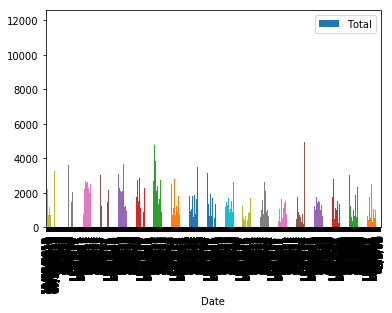

In [42]:
data.plot(kind='bar',x='Date',y='Total')

## 3 - Splitting the Years

We can split the dataset to different years. The leap years between 2008 and 2018 are 2008, 2012, and 2016. 
The counter starts at 0 and we would like to include the current and last date.

To split up the dataset, we can splice the data from rows 0 up until a certain point. Since each row corresponds to a date, we can "assume" that the next 365 sets will be the next year. 

**Note: In programming, indexes begin count at 0 instead of 1** 

For example:

In [14]:
year2017_2018 = data[0:366]

In [15]:
year2017_2018.head(1)

,Date,Public,Member,Group,School,Birthdays,Total,Weather
0,11/08/2018,477.0,303.0,42.0,276.0,0.0,1098.0,Cloudy


In [16]:
year2017_2018.tail(1)

,Date,Public,Member,Group,School,Birthdays,Total,Weather
365,11/8/17,472.0,429.0,0.0,292.0,0.0,1193.0,Cloudy


Here we can see that the 2017-2018 years of attendance includes November 8, 2017 up until November 8, 2018. 

In [17]:
year2016_2017 = data[365:731]

In [18]:
year2015_2016 = data[730:1096]

In [19]:
year2014_2015 = data[1095:1461]

In [20]:
year2013_2014 = data[1460:1826]

In [21]:
year2012_2013 = data[1825:2191]

In [22]:
year2011_2012 = data[2190:2556]

In [23]:
year2010_2011 = data[2555:2920]

In [24]:
year2009_2010 = data[2920:3286]

In [25]:
year2008_2009 = data[3285:3650]

In [26]:
year2007_2008 = data[3650:4016] #leftover beginning data

In [27]:
year2007_2008

,Date,Public,Member,Group,School,Birthdays,Total,Weather
3650,8/14/08,1122.0,268.0,303.0,0.0,0.0,1693.0,0
3651,8/13/08,1314.0,259.0,198.0,0.0,0.0,1771.0,0
3652,8/12/08,1270.0,335.0,80.0,0.0,0.0,1685.0,0
3653,8/11/08,1028.0,324.0,144.0,0.0,0.0,1496.0,0
3654,8/10/08,1414.0,596.0,37.0,0.0,0.0,2047.0,0
3655,8/9/08,2615.0,753.0,36.0,0.0,0.0,3404.0,0
3656,8/8/08,1094.0,300.0,118.0,0.0,0.0,1512.0,0
3657,8/7/08,1237.0,283.0,144.0,0.0,0.0,1664.0,0
3658,8/6/08,1363.0,276.0,189.0,0.0,0.0,1828.0,0
3659,8/5/08,934.0,213.0,217.0,0.0,0.0,1364.0,0


It is worth noting that there is the potential that some dates are added into the wrong year. 

It is also important to note that the days listed in this indexing is ordered from newest to oldest. For example, in `year2017_2018`, the dataset starts from November 8, 2018 until November 8, 2017. In other words, the dataset is counting down the days from today until the same date a year ago. 

## 3.1 - Graphing 2017 to 2018

This section will serve as a demonstration on the types of graphing we can perform using `matplotlib`. 

Specifically, we can use a bar chart or line graph to make several kinds of visualizations. 

**Recall: The date x-axis is counting down from the newest date until the oldest date.**

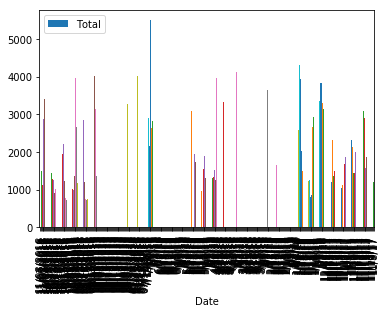

In [103]:
year2017_2018.plot(kind='bar', x = 'Date', y = 'Total')

Let's plot the total attendance for each day of the year in 2017-2018 the data was available. 

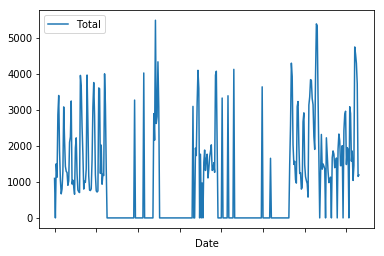

In [65]:
year2017_2018.plot(kind = 'line', x = 'Date', y = 'Total')

We can compare this with the attendance to the previous year, 2016-2017

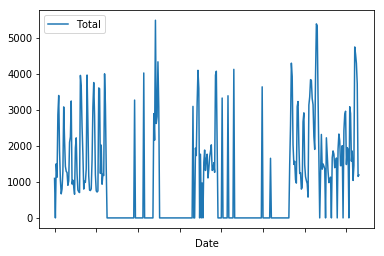

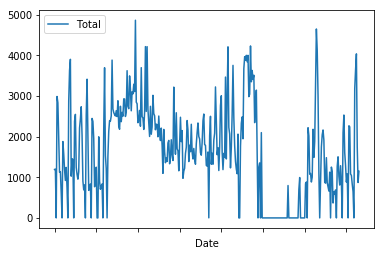

In [73]:
year2017_2018.plot(kind = 'line', x = 'Date', y = 'Total')
year2016_2017.plot(kind = 'line', x = 'Date', y = 'Total');

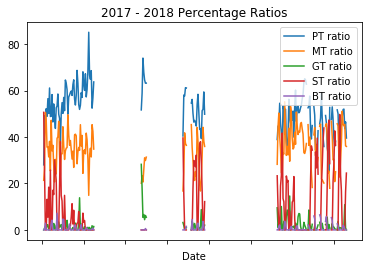

In [33]:
year2017_2018.plot(kind = 'line', x = 'Date', y = ['PT ratio', 'MT ratio', 'GT ratio','ST ratio','BT ratio'])
plt.title('2017 - 2018 Percentage Ratios');

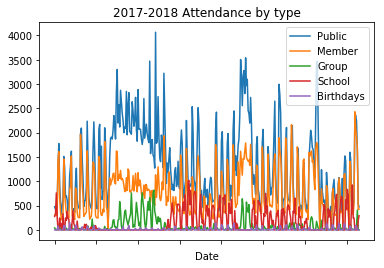

In [37]:
year2017_2018.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2017-2018 Attendance by type');

## 3.2 - All Percentage Ratios

For this section, we can graph out the percentage ratios of attendance memberships.

**Recall: The date x-axis is counting down from newest to oldest date.** 

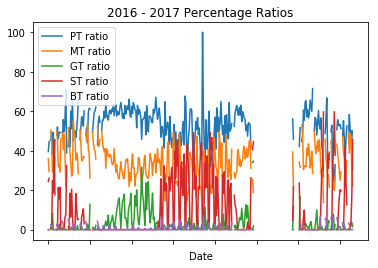

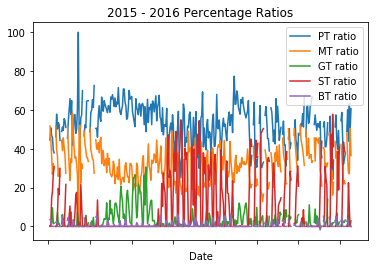

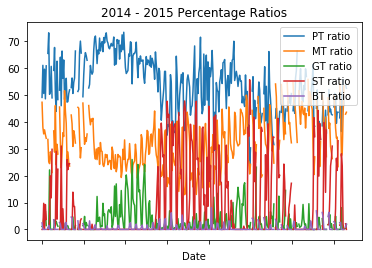

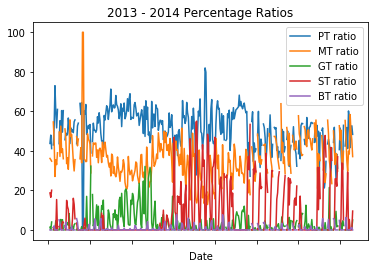

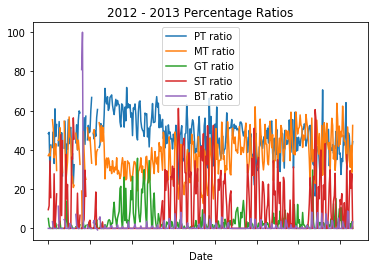

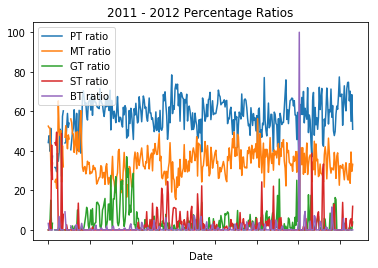

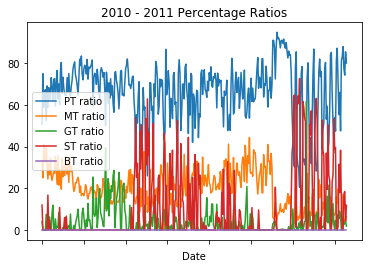

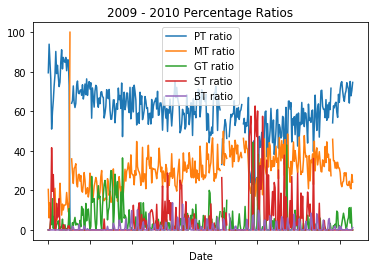

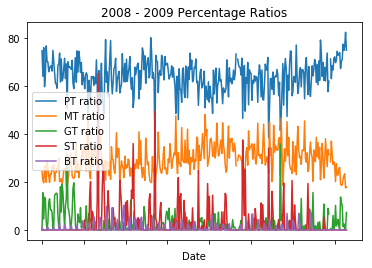

In [77]:
year2016_2017.plot(kind = 'line', x = 'Date', y = ['PT ratio', 'MT ratio', 'GT ratio','ST ratio','BT ratio'])
plt.title('2016 - 2017 Percentage Ratios');
year2015_2016.plot(kind = 'line', x = 'Date', y = ['PT ratio', 'MT ratio', 'GT ratio','ST ratio','BT ratio'])
plt.title('2015 - 2016 Percentage Ratios');
year2014_2015.plot(kind = 'line', x = 'Date', y = ['PT ratio', 'MT ratio', 'GT ratio','ST ratio','BT ratio'])
plt.title('2014 - 2015 Percentage Ratios');
year2013_2014.plot(kind = 'line', x = 'Date', y = ['PT ratio', 'MT ratio', 'GT ratio','ST ratio','BT ratio'])
plt.title('2013 - 2014 Percentage Ratios');
year2012_2013.plot(kind = 'line', x = 'Date', y = ['PT ratio', 'MT ratio', 'GT ratio','ST ratio','BT ratio'])
plt.title('2012 - 2013 Percentage Ratios');
year2011_2012.plot(kind = 'line', x = 'Date', y = ['PT ratio', 'MT ratio', 'GT ratio','ST ratio','BT ratio'])
plt.title('2011 - 2012 Percentage Ratios');
year2010_2011.plot(kind = 'line', x = 'Date', y = ['PT ratio', 'MT ratio', 'GT ratio','ST ratio','BT ratio'])
plt.title('2010 - 2011 Percentage Ratios');
year2009_2010.plot(kind = 'line', x = 'Date', y = ['PT ratio', 'MT ratio', 'GT ratio','ST ratio','BT ratio'])
plt.title('2009 - 2010 Percentage Ratios');
year2008_2009.plot(kind = 'line', x = 'Date', y = ['PT ratio', 'MT ratio', 'GT ratio','ST ratio','BT ratio'])
plt.title('2008 - 2009 Percentage Ratios');

## 3.3 - Graphing all attendance types by year

Let's graph out all annual attendance types for each year the data was available. 

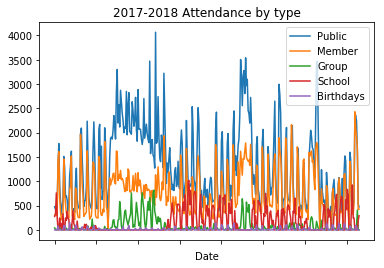

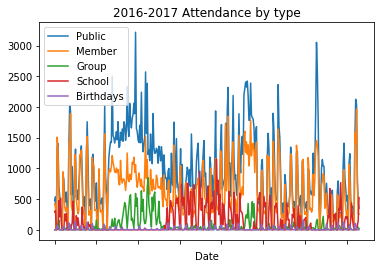

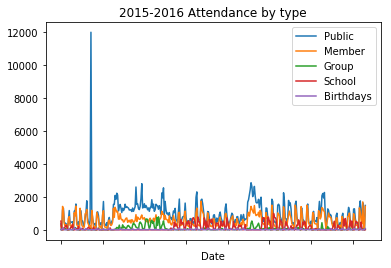

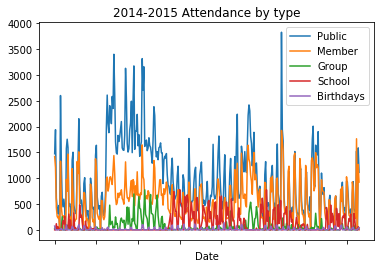

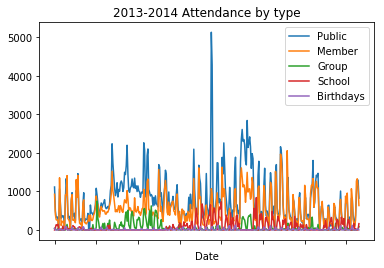

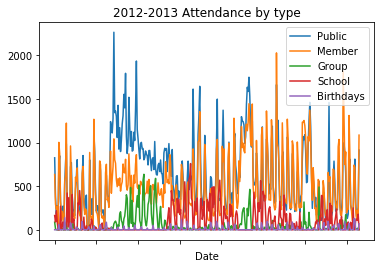

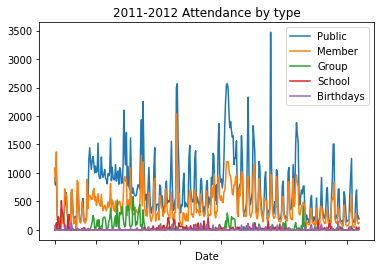

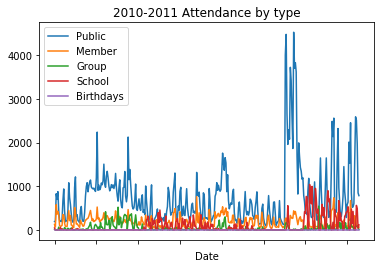

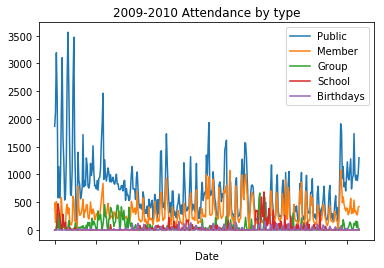

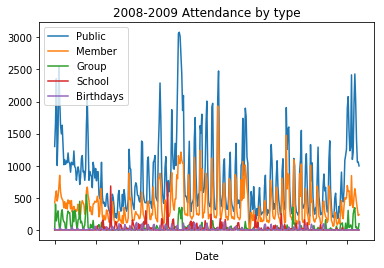

In [38]:
year2017_2018.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2017-2018 Attendance by type');
year2016_2017.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2016-2017 Attendance by type');
year2015_2016.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2015-2016 Attendance by type');
year2014_2015.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2014-2015 Attendance by type');
year2013_2014.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2013-2014 Attendance by type');
year2012_2013.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2012-2013 Attendance by type');
year2011_2012.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2011-2012 Attendance by type');
year2010_2011.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2010-2011 Attendance by type');
year2009_2010.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2009-2010 Attendance by type');
year2008_2009.plot(kind = 'line', x = 'Date', y = ['Public','Member','Group','School','Birthdays'])
plt.title('2008-2009 Attendance by type');

If we're curious, we can find the busiest days each year:

In [49]:
year2017_2018.sort_values(by = 'Total', ascending = False).head(2)

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
121,7/10/18,4064.0,1131.0,297.0,0.0,0.0,5492.0,Cloudy,73.998543,20.593591,5.407866,0.0,0.0
314,12/29/17,3420.0,1795.0,176.0,0.0,0.0,5391.0,Rainy,63.439065,33.296234,3.264700,0.0,0.0


In [48]:
year2016_2017.sort_values(by = 'Total', ascending = False).head(2)

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
462,8/3/17,3217.0,1058.0,591.0,0.0,0.0,4866.0,Sunny,66.111796,21.742704,12.145499,0.0,0.0
679,12/29/16,3053.0,1454.0,144.0,0.0,0.0,4651.0,Rainy,65.641797,31.262094,3.096108,0.0,0.0


In [47]:
year2015_2016.sort_values(by = 'Total', ascending = False).head(2)

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
766,10/2/16,11996.0,0.0,0.0,0.0,0.0,11996.0,Sunny,100.000000,0.000000,0.000000,0.0,0.0
958,3/24/16,2853.0,1417.0,394.0,0.0,0.0,4664.0,Cloudy,61.170669,30.381647,8.447684,0.0,0.0


In [46]:
year2014_2015.sort_values(by = 'Total', ascending = False).head(1)

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
1367,2/9/15,3830.0,1927.0,26.0,0.0,0.0,5783.0,Rainy,66.228601,33.321805,0.449594,0.0,0.0


In [50]:
year2013_2014.sort_values(by = 'Total', ascending = False).head(1)

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
1648,5/4/14,5132.0,1071.0,6.0,0.0,53.0,6262.0,Rainy,81.954647,17.103162,0.095816,0.0,0.846375


In [51]:
year2012_2013.sort_values(by = 'Total', ascending = False).head(1)

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
2091,2/11/13,1664.0,2028.0,17.0,0.0,0.0,3709.0,Rainy,44.863845,54.677811,0.458345,0.0,0.0


In [52]:
year2011_2012.sort_values(by = 'Total', ascending = False).head(1)

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
2336,5/21/12,2501.0,2036.0,56.0,20.0,0.0,4613.0,Rainy,54.216345,44.136137,1.213961,0.433557,0.0


In [53]:
year2010_2011.sort_values(by = 'Total', ascending = False).head(1)

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
2841,12/30/10,4530.0,437.0,19.0,0.0,0.0,4986.0,Sunny,90.854392,8.764541,0.381067,0.0,0.0


In [54]:
year2009_2010.sort_values(by = 'Total', ascending = False).head(1)

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
2943,9/18/10,3473.0,546.0,15.0,4.0,0.0,4038.0,Rainy,86.007925,13.521545,0.371471,0.099059,0.0


In [55]:
year2008_2009.sort_values(by = 'Total', ascending = False).head(1)

,Date,Public,Member,Group,School,Birthdays,Total,Weather,PT ratio,MT ratio,GT ratio,ST ratio,BT ratio
3434,3/19/09,3079.0,1038.0,347.0,0.0,0.0,4464.0,0,68.974014,23.252688,7.773297,0.0,0.0


## 3.4 - Average Total Attendance

First we can find the total attendance numbers for each year

In [28]:
t17_18 = year2017_2018['Total'].sum()
t16_17 = year2016_2017['Total'].sum()
t15_16 = year2015_2016['Total'].sum()
t14_15 = year2014_2015['Total'].sum()
t13_14 = year2013_2014['Total'].sum()
t12_13 = year2012_2013['Total'].sum()
t11_12 = year2011_2012['Total'].sum()
t10_11 = year2010_2011['Total'].sum()
t9_10 = year2009_2010['Total'].sum()
t8_9 = year2008_2009['Total'].sum()

We could then average it by every day of the year, but more accurately based on the days the museum was open. Also recall that 2008, 2012, 2016 are leap years. For now, we will assume that the museum was open every day due to unavailability of information.

In [29]:
lod = [t8_9, t9_10, t10_11, t11_12, t12_13, t13_14, t14_15, t15_16, t16_17, t17_18]
# list of total attendance

In [30]:
lod

[469775.0,
 424016.0,
 404444.0,
 451601.0,
 481529.0,
 552709.0,
 652742.0,
 636201.0,
 598137.0,
 379001.0]

We can see that `lod` returns a list containing the sum of all the `Total` values for each day. 

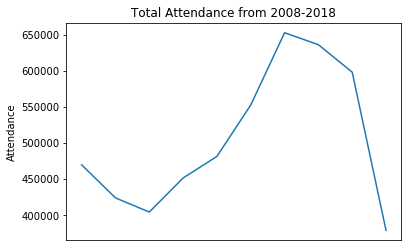

In [31]:
plt.plot(lod)
plt.title('Total Attendance from 2008-2018');
plt.xticks([]);
plt.ylabel('Attendance');

A possible reason why the 2017-2018 year sum `Total` is so much lower than even the 2008-2009 year is because of gaps in the data. 

In [32]:
year2017_2018['Total']

0      1098.0
1         0.0
2      1503.0
3      1131.0
4      2866.0
5      3402.0
6      1866.0
7      1051.0
8       668.0
9       805.0
10     1296.0
11     3084.0
12     2162.0
13     1433.0
14     1294.0
15     1260.0
16      906.0
17     1029.0
18     2099.0
19     2250.0
20     3249.0
21      940.0
22     1049.0
23      872.0
24      657.0
25     1945.0
26     2224.0
27     1223.0
28      773.0
29      727.0
        ...  
336    1395.0
337    1495.0
338    1665.0
339       0.0
340    1916.0
341    2331.0
342    2139.0
343    1451.0
344    1456.0
345    2007.0
346       0.0
347    2425.0
348    2871.0
349    2964.0
350    1483.0
351    1953.0
352    1908.0
353       0.0
354    3089.0
355    2899.0
356    1576.0
357    1858.0
358    1041.0
359    1454.0
360    4750.0
361    4547.0
362    4294.0
363    3723.0
364    1152.0
365    1193.0
Name: Total, Length: 366, dtype: float64

We can see that there are dates where the `Total` column has not been filled in. Now let's graph the average attendance per day. I will make serval assumptions here: 
    1. Assume the museum was open 365 days a year
    2. Every four years will be a leap year

In [33]:
n = 365
leap = 366

a1 = t17_18/n
a2 = t16_17/leap
a3 = t15_16/n
a4 = t14_15/n
a5 = t13_14/n
a6 = t12_13/leap
a7 = t11_12/n
a8 = t10_11/n
a9 = t9_10/n
a8 = t8_9/leap

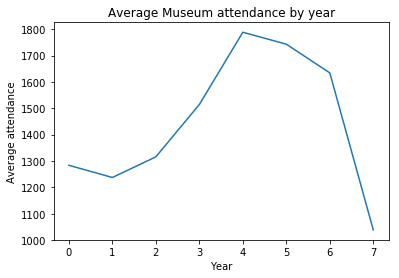

In [34]:
a = [a8, a7, a6, a5, a4, a3, a2, a1]
plt.plot(a);
plt.xlabel('Year')
plt.ylabel('Average attendance')
plt.title('Average Museum attendance by year');

In [35]:
a

[1283.5382513661202,
 1237.2630136986302,
 1315.6530054644809,
 1514.2712328767122,
 1788.3342465753424,
 1743.0164383561644,
 1634.2540983606557,
 1038.358904109589]

`a` returns the average number of attendance for each year. 

## 3.5 - Graphing Annual Public vs. Member 

Let's graph out the annual public and membership attendances in a line graph.

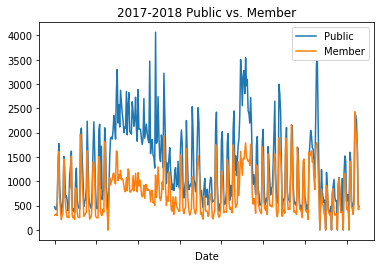

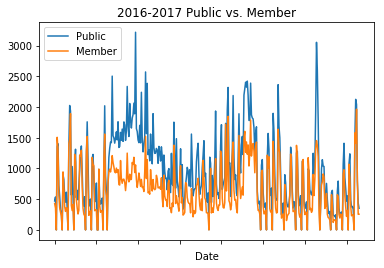

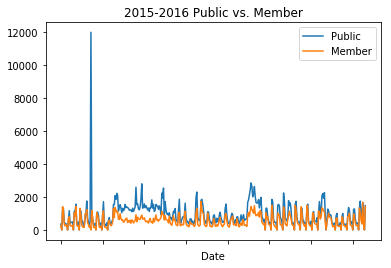

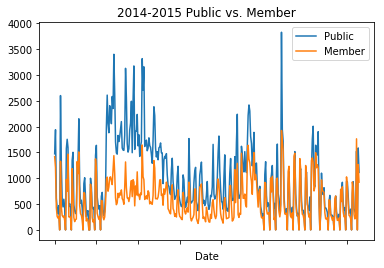

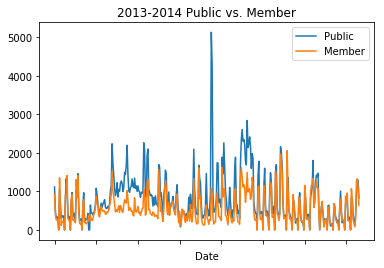

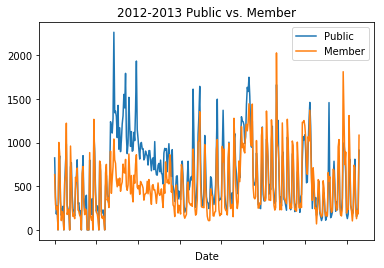

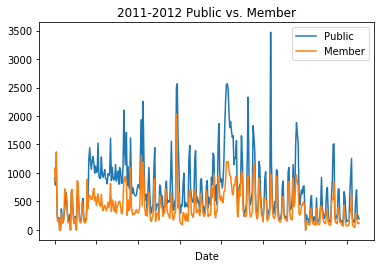

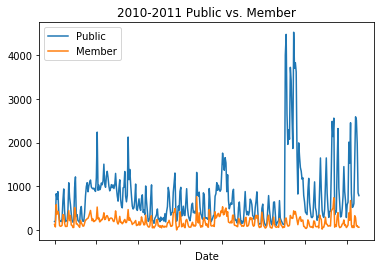

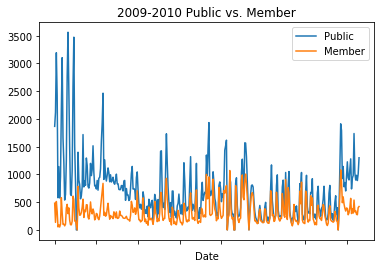

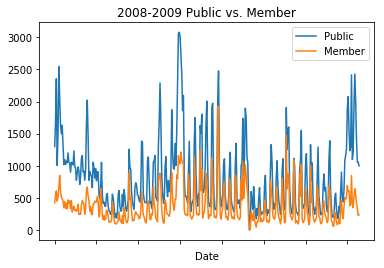

In [45]:
year2017_2018.plot(kind = 'line', x = 'Date', y = ['Public','Member'])
plt.title('2017-2018 Public vs. Member');
year2016_2017.plot(kind = 'line', x = 'Date', y = ['Public','Member'])
plt.title('2016-2017 Public vs. Member');
year2015_2016.plot(kind = 'line', x = 'Date', y = ['Public','Member'])
plt.title('2015-2016 Public vs. Member');
year2014_2015.plot(kind = 'line', x = 'Date', y = ['Public','Member'])
plt.title('2014-2015 Public vs. Member');
year2013_2014.plot(kind = 'line', x = 'Date', y = ['Public','Member'])
plt.title('2013-2014 Public vs. Member');
year2012_2013.plot(kind = 'line', x = 'Date', y = ['Public','Member'])
plt.title('2012-2013 Public vs. Member');
year2011_2012.plot(kind = 'line', x = 'Date', y = ['Public','Member'])
plt.title('2011-2012 Public vs. Member');
year2010_2011.plot(kind = 'line', x = 'Date', y = ['Public','Member'])
plt.title('2010-2011 Public vs. Member');
year2009_2010.plot(kind = 'line', x = 'Date', y = ['Public','Member'])
plt.title('2009-2010 Public vs. Member');
year2008_2009.plot(kind = 'line', x = 'Date', y = ['Public','Member'])
plt.title('2008-2009 Public vs. Member');

## 3.6 - Finding Specific Dates

Suppose we wanted to locate specific dates in the year. Then we can use `.set_index()` to index the date and use the `.loc[[]]` function to find a date and return as a DataFrame.

In [39]:
index = data.set_index('Date')

In [15]:
index.head(1)

,Public,Member,Group,School,Birthdays,Total,Weather
Date,,,,,,,
11/08/2018,477.0,303.0,42.0,276.0,0.0,1098.0,Cloudy


In [16]:
index.loc[['12/24/17']]

,Public,Member,Group,School,Birthdays,Total,Weather
Date,,,,,,,
12/24/17,629.0,542.0,0.0,0.0,25.0,1196.0,Cloudy


On Christmas Eve, there was a total of 1196 guests; 629 were Public, 542 Members and 25 Birthday guests.

We could graph out all the Christmas eve attendance as an example.

In [17]:
xmas17 = index.loc[['12/24/17']]
xmas16 = index.loc[['12/24/16']]
xmas15 = index.loc[['12/24/15']]
xmas14 = index.loc[['12/24/14']]
xmas13 = index.loc[['12/24/13']]
xmas12 = index.loc[['12/24/12']]
xmas11 = index.loc[['12/24/11']]
xmas10 = index.loc[['12/24/10']]
xmas = [xmas10, xmas11, xmas12, xmas13, xmas14, xmas15, xmas16, xmas17]

Each of the functions above returns the attendance of Christmas Eve as a DataFrame. We can use `pd.concat()` to join them into a single DataFrame

In [18]:
xmas = pd.concat(xmas)

In [19]:
xmas

,Public,Member,Group,School,Birthdays,Total,Weather
Date,,,,,,,
12/24/10,822.0,120.0,0.0,0.0,0.0,942.0,Rainy
12/24/11,438.0,260.0,0.0,0.0,0.0,698.0,Sunny
12/24/12,245.0,339.0,0.0,0.0,0.0,584.0,Cloudy
12/24/13,330.0,403.0,12.0,0.0,0.0,745.0,Cloudy
12/24/14,295.0,373.0,0.0,0.0,0.0,668.0,Sunny
12/24/15,515.0,447.0,20.0,0.0,0.0,982.0,Cloudy
12/24/16,423.0,420.0,0.0,0.0,0.0,843.0,Cloudy
12/24/17,629.0,542.0,0.0,0.0,25.0,1196.0,Cloudy


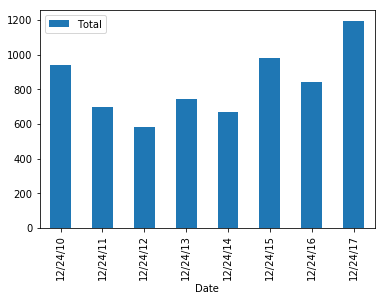

In [20]:
xmas.plot(kind = 'bar', y = 'Total')

Another example is looking at New Year's Eve and New Year's Day. 

In [40]:
nye10 = index.loc[['12/31/10']]
nye11 = index.loc[['12/31/11']]
nye12 = index.loc[['12/31/12']]
nye13 = index.loc[['12/31/13']]
nye14 = index.loc[['12/31/14']]
nye15 = index.loc[['12/31/15']]
nye16 = index.loc[['12/31/16']]
nye17 = index.loc[['12/31/17']]
nye = [nye10, nye11, nye12, nye13, nye14, nye15, nye16, nye17]

In [41]:
nye = pd.concat(nye)
nye

,Public,Member,Group,School,Birthdays,Total,Weather
Date,,,,,,,
12/31/10,1866.0,269.0,0.0,0.0,0.0,2135.0,Sunny
12/31/11,641.0,479.0,72.0,0.0,0.0,1192.0,Sunny
12/31/12,550.0,638.0,21.0,0.0,0.0,1209.0,Sunny
12/31/13,717.0,784.0,47.0,0.0,0.0,1548.0,Cloudy
12/31/14,840.0,829.0,68.0,0.0,0.0,1737.0,Sunny
12/31/15,911.0,781.0,26.0,0.0,0.0,1718.0,Sunny
12/31/16,1065.0,817.0,0.0,0.0,0.0,1882.0,Snowy
12/31/17,1075.0,828.0,0.0,0.0,0.0,1903.0,Cloudy


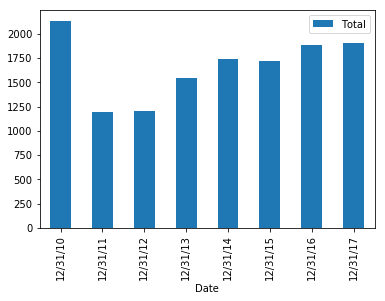

In [42]:
nye.plot(kind = 'bar', y = 'Total')

In [43]:
ny10 = index.loc[['1/1/10']]
ny11 = index.loc[['1/1/11']]
ny12 = index.loc[['1/1/12']]
ny13 = index.loc[['1/1/13']]
ny14 = index.loc[['1/1/14']]
ny15 = index.loc[['1/1/15']]
ny16 = index.loc[['1/1/16']]
ny17 = index.loc[['1/1/17']]
ny = [ny10, ny11, ny12, ny13, ny14, ny15, ny16, ny17]
ny = pd.concat(ny)

In [44]:
ny

,Public,Member,Group,School,Birthdays,Total,Weather
Date,,,,,,,
1/1/10,948.0,593.0,0.0,0.0,0.0,1541.0,Rainy
1/1/11,2583.0,263.0,0.0,0.0,0.0,2846.0,Sunny
1/1/12,645.0,415.0,0.0,0.0,0.0,1060.0,Rainy
1/1/13,540.0,741.0,0.0,0.0,0.0,1281.0,Sunny
1/1/14,587.0,590.0,0.0,0.0,0.0,1177.0,Rainy
1/1/15,884.0,755.0,22.0,0.0,0.0,1661.0,Sunny
1/1/16,1083.0,655.0,0.0,0.0,0.0,1738.0,Cloudy
1/1/17,908.0,559.0,23.0,0.0,0.0,1490.0,Cloudy


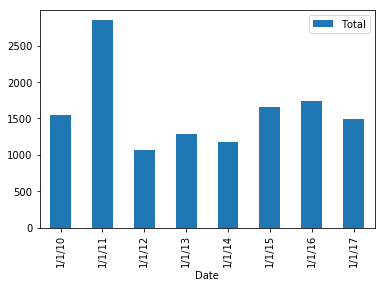

In [45]:
ny.plot(kind = 'bar', y = 'Total')

# 4. Recommendations

There are many directions data analysis can lead to depending on the type of information wanted. It is certainly difficult to perform a complete set of data analysis as ideas are constantly being thought of. Here are some suggestions for future data anylsis/projects: 

1. Consider weekend vs. weekday attendance numbers. 
2. Compare attendance years based on feature galleries. 
3. Try to understand outliers. An example is from when we found that one date in the 2015-2016 year had 11,000+ guests. Future analysis could look into the types of activities guests interacted with that day at the museum. 
4. Pair attendance data with gallery interactions and create "heat maps" of the busiest parts of the museum throughout the day.  